# Lab Assignment 3

## Andrew Marquardt

Question 1

In [54]:
# libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tclab import TCLab, clock, Historian, Plotter

In [55]:
# Constants and initial values
d = 0.5 # degrees C; tolerance for dead zone historesis
heater_min = 0
heater_max = 100
target_T1 = 35
target_T2 = 45

In [56]:
# functions to run
def T1_control(t,min_U,max_U,target,dead_val,T_current,U_current):
    if t >= 20:
        if T_current < (target - dead_val):
            U1 = max_U
        elif T_current > (target + dead_val):
            U1 = min_U
        else:
            U1 = U_current
    else:
        U1 = U_current
    return U1

def determine_T0(T0,tmin):
    if t <= tmin:
        T0 = tcl.T1
    return T0

def SP_control(t,tmin,tmax,target,T0):
    SP_inc = (target-T0)/(tmax-tmin)
    if t >= tmin and t <= tmax:
        SP = T0 + (t-tmin)*SP_inc
        return SP
    elif t < tmin:
        return T0
    elif t > tmax:
        return target

def T2_control(t,min_U,max_U,target,dead_val,T_current,U_current):
    if t >= 120:
        if T_current < (target - dead_val):
            U2 = max_U
        elif T_current > (target + dead_val):
            U2 = min_U
        else: U2 = U_current
    else:
        U2 = U_current
    return U2

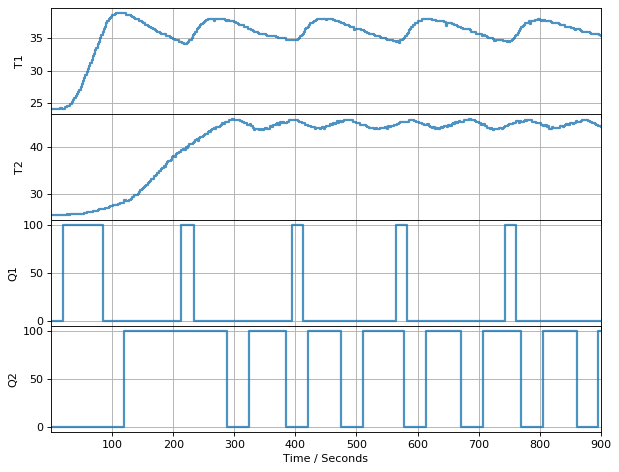

TCLab disconnected successfully.


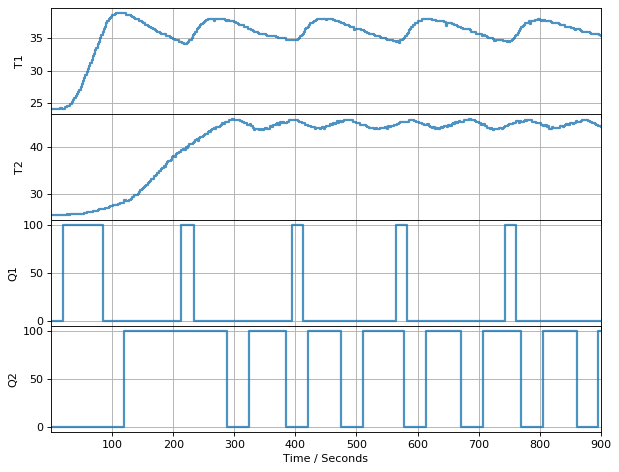

In [57]:
with TCLab() as tcl:
    h = Historian(tcl.sources)
    p = Plotter(h,900)
    T0 = tcl.T2
    for t in clock(900):
        T0 = determine_T0(T0,120)
        SP2 = SP_control(t,120,220,target_T2,T0)
        tcl.U1 = T1_control(t,heater_min,heater_max,target_T1,d,tcl.T1,tcl.U1)
        tcl.U2 = T2_control(t,heater_min,heater_max,SP2,d,tcl.T2,tcl.U2)
        p.update(t)
h.to_csv('data_1_lab_2.csv')

It seems like the steady state oscillation occurs with a maximum deviation of about 4 degrees (in the positive direction above the target) for T1 and 1.5 degrees C (in the negative direction below the target) for T2.  Overall, it seemed as if T1 deviated from the set point more than T2, most likely because of the presence of the second heater being switched "on" far more than the first heater.

After reaching steady oscillation, heater 1 would alternate between being on for about 20 seconds and off for about 160 seconds.  Heater 2 would alternate between being on for about 60 seconds and off for about 40 seconds.

Question 2

In [122]:
from tclab import TCLab, clock, Historian, Plotter, setup
# PI control function
def PI_control(Kp,Ki,U_min,Umax,SP,e_prev,MV,T_current):
    e = SP-T_current
    MV += Kp*(e-e_prev) + Ki*e
    if MV > 100:
        MV = 100
    elif MV < 0:
        MV = 0
    return MV,e

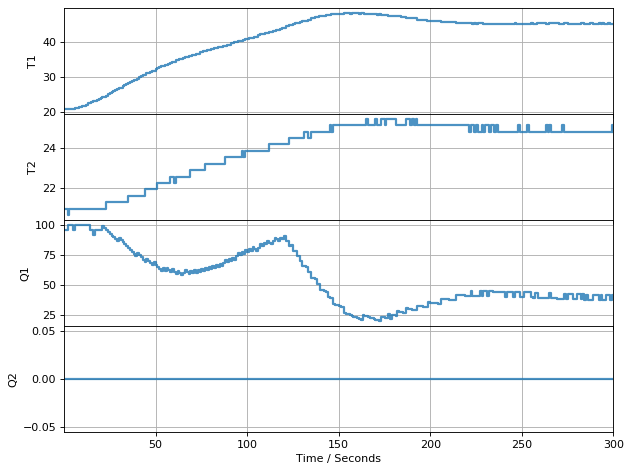

45.122
TCLab Model disconnected successfully.


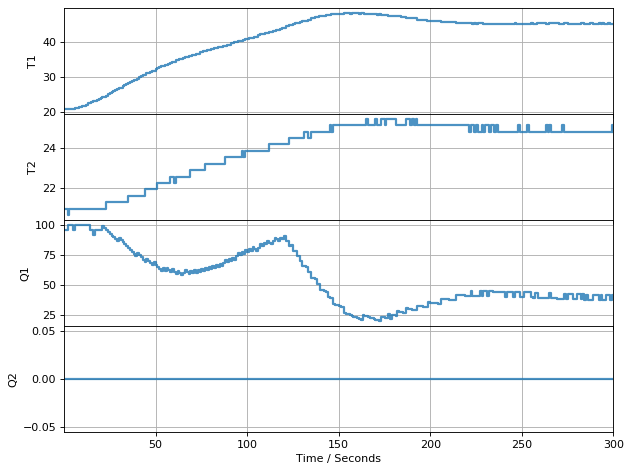

In [137]:
# simulation run
Kp = 13
Ki = 0.18
TCLab = setup(connected=False)
with TCLab() as tcl:
    T_init = tcl.T1
    h = Historian(tcl.sources)
    p = Plotter(h, 300)
    e = 0
    MV = 100
    for t in clock(300):
        T_init = determine_T0(T_init,20)
        SP1 = SP_control(t,20,120,target_T2,T_init)
        T_current = tcl.T1
        MV_new,e = PI_control(Kp,Ki,0,100,SP1,e,MV,T_current)
        tcl.U1 = MV_new
        MV = MV_new
        p.update(t)
        print(tcl.T1)

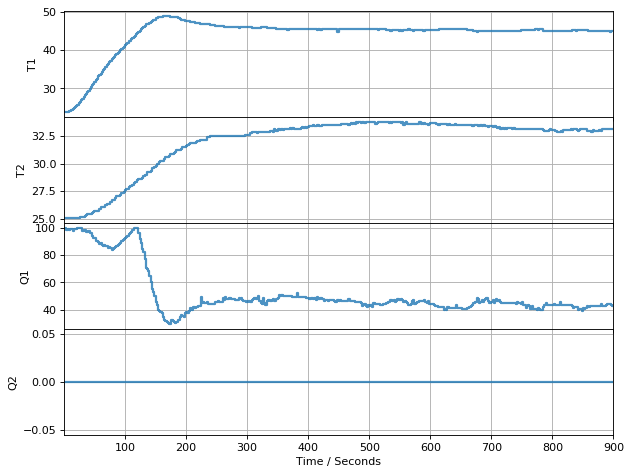

TCLab disconnected successfully.


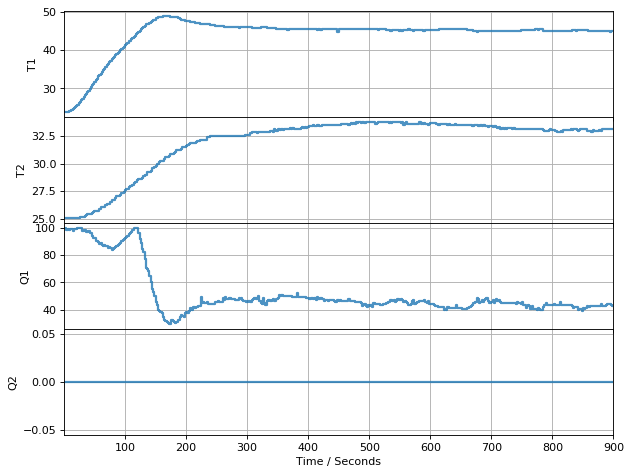

In [138]:
#actual run of heaters
from tclab import TCLab, clock, Historian, Plotter
# final values of constants
Kp = 13
Ki = 0.18
with TCLab() as tcl:
    T_init = tcl.T1
    h = Historian(tcl.sources)
    p = Plotter(h, 900)
    e = 0
    MV = 100
    for t in clock(900):
        T_init = determine_T0(T_init,20)
        SP1 = SP_control(t,20,120,target_T2,T_init)
        T_current = tcl.T1
        MV_new,e = PI_control(Kp,Ki,0,100,SP1,e,MV,T_current)
        tcl.U1 = MV_new
        MV = MV_new
        p.update(t)

In [139]:
h.to_csv('data_2_lab_3.csv')

In [140]:
import pandas as pd
data = pd.read_csv('data_2_lab_3.csv')
data.index = data["Time"]

In [160]:
T1_max = 0
T1_min = 100
for i in range(k):
    if data.index[i] > 350:
        if data['T1'].values[i] > T1_max:
            T1_max = data['T1'].values[i]
        elif data['T1'].values[i] < T1_min:
            T1_min = data['T1'].values[i]
neg_dev = 45 - T1_min
pos_dev = T1_max - 45
if neg_dev > pos_dev:
    print("Maximum deviation from set point: " + str(neg_dev) + " degrees C.")
elif neg_dev < pos_dev:
    print("Maximum deviation from set point: " + str(pos_dev) + " degrees C.")
else:
    print("Maximum deviation from set point: " + str(pos_dev) + " degrees C.")

Maximum deviation from set point: 0.6160000000000068 degrees C.
